# Neural Networks - intro
## Part 1 - XOR
1. Using the XOR dataset below, train (400 epochs) a neural network (NN) using 2, 3, 4, and 5 hidden layers (where each layer has only 2 neurons). For each n layers, store the resulting accuracy along with n. Plot the results to find what the optimal number of layers is.
2. Repeat the above with 3 neurons in each Hidden layers. How do these results compare to the 2 neuron layers?
3. Repeat the above with 4 neurons in each Hidden layers. How do these results compare to the 2 and 3 neuron layers?
3. Using the most optimal configuraion (n-layers, k-neurons per layer), compare how `tanh`, `sigmoid`,`softplus` and `relu` effect the loss after 400 epochs. Try other Activation functions as well (https://keras.io/activations/)
4. Again with the most optimal setup, try other optimizers (instead of `SGD`) and report on the loss score. (https://keras.io/optimizers/)

In [2]:
!pip3 install tensorflow keras

  Using cached tensorflow-2.16.2-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.2-cp310-cp310-win_amd64.whl (376.9 MB)


In [15]:
!pip3 install tabulate

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD  #Stochastic Gradient Descent
from tabulate import tabulate 

import numpy as np

# fix random seed for reproducibility
np.random.seed(7)

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
n = 40
xx = np.random.random((n,1))
yy = np.random.random((n,1))

In [5]:
X = np.array([np.array([xx,-xx,-xx,xx]),np.array([yy,-yy,yy,-yy])]).reshape(2,4*n).T
y = np.array([np.ones([2*n]),np.zeros([2*n])]).reshape(4*n)

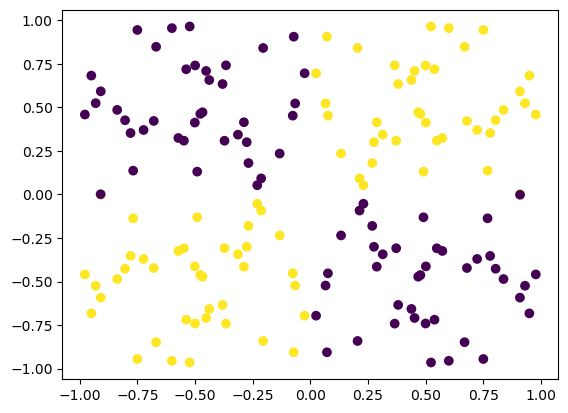

In [6]:
plt.scatter(*zip(*X), c=y)

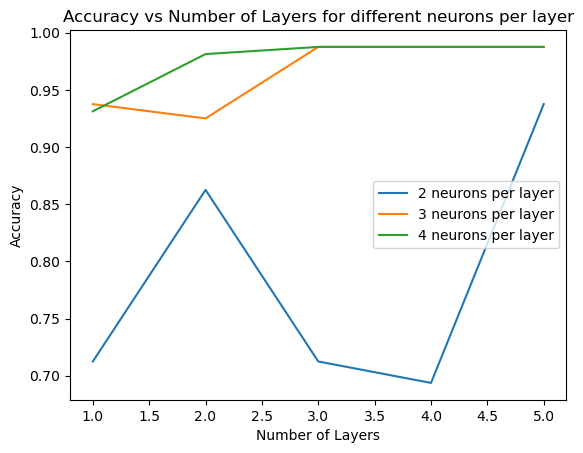

In [9]:
# Defining function to test different configurations 
def build_and_train_model(num_layers, num_neurons, epochs=400):
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=2, activation='tanh'))
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.1), metrics=['accuracy'])
    model.fit(X, y, batch_size=2, epochs=epochs, verbose=0)
    
    scores = model.evaluate(X, y, verbose=0)
    return scores[1]  # Return accuracy

# Define the number of layers and neurons per layer
num_layers_list = [1, 2, 3, 4, 5]
neurons_per_layer = [2, 3, 4]
epochs = 400

# Store results for plotting
results = {}

for neurons in neurons_per_layer:
    scores = []
    for num_layer in num_layers_list:
        score = build_and_train_model(num_layer, neurons, epochs)
        scores.append(score)
    results[neurons] = scores

# Plot the results
for neurons in neurons_per_layer:
    plt.plot(num_layers_list, results[neurons], label=f'{neurons} neurons per layer')

plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Number of Layers for different neurons per layer')
plt.show()

In [17]:
# Generating an accuracy table 
headers = ['Number of Layers'] + [f'{neurons} Neurons' for neurons in neurons_per_layer]
table_data = []

for i, num_layer in enumerate(num_layers_list):
    row = [num_layer] + [results[neurons][i] for neurons in neurons_per_layer]
    table_data.append(row)

print("Accuracy Rates:")
print(tabulate(table_data, headers=headers))


Accuracy Rates:
  Number of Layers    2 Neurons    3 Neurons    4 Neurons
------------------  -----------  -----------  -----------
                 1      0.7125        0.9375      0.93125
                 2      0.8625        0.925       0.98125
                 3      0.7125        0.9875      0.9875
                 4      0.69375       0.9875      0.9875
                 5      0.9375        0.9875      0.9875


**Interpretation:** For models with 2 neurons per layer, the optimal number of layers is 5, reaching an accuracy rate of approximately 95%. However, increasing the number of neurons per layer drastically increased the accuracy rate, even for a smaller amount of layers. With that said, the accuracy rate for models containing 3 or more hidden layers with 3 or 4 neurons at each layer could not surpass 98.75%. With that in mind, the most optimal model that minimizes unnecessary complexity and maximizes accuracy is a model with 3 hidden layers with 3 neurons at each layer. 

In [18]:
from keras.layers import Activation

# Define activation functions to compare
activation_functions = ['tanh', 'sigmoid', 'softplus', 'relu', 'elu', 'selu', 'swish']

# Function to build and train model with specified activation function
def build_and_train_model_with_activation(activation, epochs=400):
    model = Sequential()
    model.add(Dense(3, input_dim=2))
    model.add(Activation(activation))  # Add specified activation function
    model.add(Dense(3))
    model.add(Activation(activation))
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation
    
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    model.fit(X, y, batch_size=2, epochs=epochs, verbose=0)
    
    loss, accuracy = model.evaluate(X, y, verbose=0)
    return loss, accuracy

# Storing results for each activation function
activation_results = {}

for activation in activation_functions:
    loss, accuracy = build_and_train_model_with_activation(activation)
    activation_results[activation] = {'loss': loss, 'accuracy': accuracy}

# Print results
print("Activation Function Comparison:")
print("{:<10} {:<10} {:<10}".format('Activation', 'Loss', 'Accuracy'))
print("----------------------------------")
for activation, result in activation_results.items():
    print("{:<10} {:<10.4f} {:<10.4f}".format(activation, result['loss'], result['accuracy']))


Activation Function Comparison:
Activation Loss       Accuracy  
----------------------------------
tanh       0.0380     0.9875    
sigmoid    0.6922     0.5125    
softplus   0.0886     0.9563    
relu       0.4902     0.7437    
elu        0.0364     0.9875    
selu       0.0348     0.9875    
swish      0.0956     0.9563    


**Interpretation:** In terms of best performers, tanh, elu, and selu activation functions achieved the highest accuracy (98.75%) with relatively low loss (<0.05). The sigmoid activation function performed horribly, achieving an accuracy rate of 51.25% with a very high loss score of 0.69, indicating that it is not suitable for this use case. Softplus and relu activation functions performed decently compared to sigmoid, however they did not achieve as high accuracy scores and had higher loss scores. 

## Part 2 - BYOD (Bring your own Dataset)
Using your own dataset, experiment and find the best Neural Network configuration. 
You may use any resource to improve results, just reference it.

While you may use any dataset, I'd prefer you didn't use the diabetes dataset used in the lesson.

https://stackoverflow.com/questions/34673164/how-to-train-and-tune-an-artificial-multilayer-perceptron-neural-network-using-k

https://keras.io/

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Reading data 
cancer = pd.read_csv('breastcancer.csv')

# Converting 'diagnosis' into binary variable
cancer['diagnosis'] = cancer['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Dropping any rows with missing values 
cancer.dropna(inplace=True)

# Previewing data
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Splitting into X and y
X = cancer.drop(['id', 'diagnosis'], axis=1)  # Features
y = cancer['diagnosis']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify data split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [28]:
# Defining new function to test different configurations for breast cancer dataset, trainign & testing sets

def build_and_train_model(layers, neurons, activation, optimizer, epochs=50):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluating the model on test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return loss, accuracy, history


In [34]:
# Define configurations to test
configurations = [
    {'layers': 2, 'neurons': 3, 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': 3, 'neurons': 4, 'activation': 'tanh', 'optimizer': 'adam'},
    {'layers': 4, 'neurons': 5, 'activation': 'sigmoid', 'optimizer': 'adam'},
    {'layers': 5, 'neurons': 6, 'activation': 'tanh', 'optimizer': 'adam'},
    {'layers': 5, 'neurons': 6, 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': 6, 'neurons': 7, 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': 5, 'neurons': 15, 'activation': 'relu', 'optimizer': 'adam'},
    {'layers': 6, 'neurons': 7, 'activation': 'softplus', 'optimizer': 'adam'},
    {'layers': 6, 'neurons': 7, 'activation': 'elu', 'optimizer': 'adam'},
    {'layers': 6, 'neurons': 7, 'activation': 'swish', 'optimizer': 'adam'},
    {'layers': 6, 'neurons': 7, 'activation': 'selu', 'optimizer': 'adam'}
    
]

results = []

# Iterate over configurations
for config in configurations:
    layers = config['layers']
    neurons = config['neurons']
    activation = config['activation']
    optimizer = config['optimizer']
    
    # Build and train model
    loss, accuracy, history = build_and_train_model(layers, neurons, activation, optimizer)
    
    # Store results
    results.append({'layers': layers, 'neurons': neurons, 'activation': activation, 'optimizer': optimizer,
                    'loss': loss, 'accuracy': accuracy, 'history': history})

# Print results
print("\nResults:")
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Layers', 'Neurons', 'Activation', 'Optimizer', 'Loss', 'Accuracy'))
print("-----------------------------------------------------------")
for result in results:
    print("{:<10} {:<10} {:<10} {:<10} {:<10.4f} {:<10.4f}".format(result['layers'], result['neurons'], 
                                                                   result['activation'], result['optimizer'], 
                                                                   result['loss'], result['accuracy']))



Results:
Layers     Neurons    Activation Optimizer  Loss       Accuracy  
-----------------------------------------------------------
2          3          relu       adam       0.3750     0.9123    
3          4          tanh       adam       0.2226     0.9386    
4          5          sigmoid    adam       0.6627     0.6228    
5          6          tanh       adam       0.2469     0.9386    
5          6          relu       adam       0.5097     0.8158    
6          7          relu       adam       0.6630     0.6228    
5          15         relu       adam       0.1565     0.9386    
6          7          softplus   adam       0.2386     0.9474    
6          7          elu        adam       0.1145     0.9561    
6          7          swish      adam       0.1972     0.9561    
6          7          selu       adam       0.1363     0.9561    


**Interpretation:** In testing several differnt models, the best configuration for the breast cancer dataset was a 6 layer model with 7 neurons at each later using an elu activation. This achieved an accuracy score of 95.61% and a relatively low loss score of 0.11. This indicates that the elu activation function and deeper architecture with more neurons per layer were effective for this particular dataset, showcasing its suitability for accurate breast cancer diagnosis prediction.

Data Source: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset
Code Help: https://towardsdatascience.com/how-to-rapidly-test-dozens-of-deep-learning-models-in-python-cb839b518531
& ChatGPT was consulted to debug 